In [75]:
install.packages("s3")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [100]:
library("terra")
library("dplyr")
library("sf")
library("sp")
library("stringr")
library("s3")
library("aws.s3")
library("scales")

In [77]:
iso3 <- "BRA"

f.path <- "s3://maap-ops-workspace/shared/leitoldv/GEDI_global_PA_v2/"
#f.path <- "/projects/my-public-bucket/GEDI_global_PA_v2/"

s3_get_files(c(paste(f.path,"WDPA_countries/shp/",iso3,".shp",sep=""),
              paste(f.path,"WDPA_countries/shp/",iso3,".shx",sep=""),
              paste(f.path,"WDPA_countries/shp/",iso3,".prj",sep=""),
              paste(f.path,"WDPA_countries/shp/",iso3,".dbf",sep="")),confirm = FALSE)
admBRA <- st_read(s3_get(paste(f.path,"WDPA_countries/shp/",iso3,".shp",sep="")))
admBRA <- vect(admBRA)

allPAsBRA <- readRDS(s3_get(paste(f.path,"WDPA_shapefiles/WDPA_polygons/",iso3,"_PA_poly.rds",sep="")))
#write.csv(allPAsBRA@data, file=paste(f.path,"WDPA_extract/allPAs_BRA_attributes.csv",sep=""))
#allPAsBRA_df <- read.csv(s3_get(paste(f.path,"WDPA_extract/allPAs_BRA_attributes.csv",sep="")))

ℹ all files already exist

ℹ s3://maap-ops-workspace/shared/leitoldv/GEDI_global_PA_v2/WDPA_countries/shp/BRA.shp already exists at /projects/.local/share/R/s3/maap-ops-workspace/shared/leitoldv/GEDI_global_PA_v2/WDPA_countries/shp/BRA.shp



Reading layer `BRA' from data source 
  `/projects/.local/share/R/s3/maap-ops-workspace/shared/leitoldv/GEDI_global_PA_v2/WDPA_countries/shp/BRA.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 1 feature and 94 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -74.01847 ymin: -33.74228 xmax: -28.87706 ymax: 5.267225
Geodetic CRS:  WGS 84


ℹ s3://maap-ops-workspace/shared/leitoldv/GEDI_global_PA_v2/WDPA_shapefiles/WDPA_polygons/BRA_PA_poly.rds already exists at /projects/.local/share/R/s3/maap-ops-workspace/shared/leitoldv/GEDI_global_PA_v2/WDPA_shapefiles/WDPA_polygons/BRA_PA_poly.rds



In [78]:
allPAsBRA_df <- read.csv(s3_get(paste(f.path,"WDPA_extract/allPAs_BRA_attributes2.csv",sep="")))

ℹ s3://maap-ops-workspace/shared/leitoldv/GEDI_global_PA_v2/WDPA_extract/allPAs_BRA_attributes2.csv already exists at /projects/.local/share/R/s3/maap-ops-workspace/shared/leitoldv/GEDI_global_PA_v2/WDPA_extract/allPAs_BRA_attributes2.csv



In [79]:
f.path <- "/projects/my-public-bucket/GEDI_global_PA_v2/"

iso3s <- c("Baz","Bca","Bce","Bma","Bpp","Bpt")
iso3names <- c("Amazônia","Caatinga","Cerrado","Mata Atlântica","Pampa","Pantanal")
adm_iso3 <- list()
for(i in 1:length(iso3s)){
  adm <- st_read(paste(f.path,"WDPA_countries/shp/",iso3s[i],".shp",sep=""))
  adm_iso3[[i]] <- vect(adm)
}
adm_iso3[[1]]

Reading layer `Baz' from data source 
  `/projects/my-public-bucket/GEDI_global_PA_v2/WDPA_countries/shp/Baz.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 1 feature and 7 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -73.98055 ymin: -16.30581 xmax: -43.61394 ymax: 5.250472
Geodetic CRS:  WGS 84
Reading layer `Bca' from data source 
  `/projects/my-public-bucket/GEDI_global_PA_v2/WDPA_countries/shp/Bca.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 1 feature and 7 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: -44.50887 ymin: -16.08888 xmax: -35.17211 ymax: -2.808682
Geodetic CRS:  WGS 84
Reading layer `Bce' from data source 
  `/projects/my-public-bucket/GEDI_global_PA_v2/WDPA_countries/shp/Bce.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 1 feature and 7 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: -60.10991 ymin: -24.68502 xmax: -41.5222 ymax: 

 class       : SpatVector 
 geometry    : polygons 
 dimensions  : 1, 7  (geometries, attributes)
 extent      : -73.98055, -43.61394, -16.30581, 5.250472  (xmin, xmax, ymin, ymax)
 coord. ref. : lon/lat WGS 84 (EPSG:4326) 
 names       : objectid_1 objectid     name shape_leng        globalid
 type        :      <int>    <int>    <chr>      <num>           <chr>
 values      :          5        5 Amazônia      178.8 {6263CBF9-F070~
 shape_Le_1 shape_Area
      <num>      <num>
      2e+07  4.267e+12

In [80]:
f.path <- "s3://maap-ops-workspace/shared/leitoldv/GEDI_global_PA_v2/"
gediwk <- 24
iso3 <- "BRA"
pa_stats_BRA_merg <- read.csv(s3_get(paste(f.path,"WDPA_extract/pa_stats/",iso3,"_pa_stats_summary_MERGE_wk",gediwk,"_2.csv", sep="")))
colnames(pa_stats_BRA_merg)

ℹ s3://maap-ops-workspace/shared/leitoldv/GEDI_global_PA_v2/WDPA_extract/pa_stats/BRA_pa_stats_summary_MERGE_wk24_2.csv already exists at /projects/.local/share/R/s3/maap-ops-workspace/shared/leitoldv/GEDI_global_PA_v2/WDPA_extract/pa_stats/BRA_pa_stats_summary_MERGE_wk24_2.csv



[1] "X.1"                  "WDPAID"               "pa_id"               
 [4] "count_0"              "count_1"              "meanrh98_0"          
 [7] "meanrh98_1"           "sdrh98_0"             "sdrh98_1"            
[10] "meanagbd_0"           "meanagbd_1"           "sdagbd_0"            
[13] "sdagbd_1"             "wwfbiom_0"            "wwfbiom_1"           
[16] "wwfecoreg_0"          "wwfecoreg_1"          "REGION_0"            
[19] "REGION_1"             "PFT_0"                "PFT_1"               
[22] "iso3"                 "rh98_difA"            "rh98_difP"           
[25] "agbd_difA"            "agbd_difP"            "X"                   
[28] "WDPA_PID"             "PA_DEF"               "NAME"                
[31] "ORIG_NAME"            "DESIG"                "DESIG_ENG"           
[34] "DESIG_TYPE"           "IUCN_CAT"             "INT_CRIT"            
[37] "MARINE"               "REP_M_AREA"           "GIS_M_AREA"          
[40] "REP_AREA"             "GIS_AREA"             "NO_TAKE"             
[43] "NO_TK_AREA"           "STATUS"               "STATUS_YR"           
[46] "GOV_TYPE"             "OWN_TYPE"             "MANG_AUTH"           
[49] "MANG_PLAN"            "VERIF"                "METADATAID"          
[52] "SUB_LOC"              "PARENT_ISO"           "ISO3"                
[55] "bbiome2"              "wwfbiome2"            "pa_area_ha"          
[58] "total_AGB"            "total_additional_AGB"

In [149]:
allPAsBRA_rowIDs <- c()
for(i in 1:length(pa_stats_BRA_merg$pa_id)){
    rowID <- which(allPAsBRA$WDPAID==pa_stats_BRA_merg$pa_id[i])
    allPAsBRA_rowIDs <- c(allPAsBRA_rowIDs, rowID)
}
length(allPAsBRA_rowIDs)   

allPAsBRA_extracted <- allPAsBRA[allPAsBRA_rowIDs,]
nrow(allPAsBRA_extracted)
allPAsBRA_NOTextracted <- allPAsBRA[-allPAsBRA_rowIDs,]
nrow(allPAsBRA_NOTextracted)

allPAsBRA_extracted_IT <- allPAsBRA_extracted[allPAsBRA_extracted$DESIG_ENG=="Indigenous Area" |
                                              allPAsBRA_extracted$DESIG_ENG=="Indigenous Reserve",]
allPAsBRA_extracted_PA <- allPAsBRA_extracted[allPAsBRA_extracted$DESIG_ENG!="Indigenous Area" &
                                              allPAsBRA_extracted$DESIG_ENG!="Indigenous Reserve",]
nrow(allPAsBRA_extracted_IT)
nrow(allPAsBRA_extracted_PA)

[1] 1618

[1] 1618

[1] 903

[1] 635

[1] 983

In [150]:
allPAsBRA_extracted$agbd_difA <- round(as.numeric(pa_stats_BRA_merg[,"agbd_difA"]),3)/1000000
allPAsBRA_extracted$total_additional_AGB <- round(as.numeric(pa_stats_BRA_merg[,"total_additional_AGB"]),3)/1000000
allPAsBRA_extracted$pa_area_ha <- round(as.numeric(pa_stats_BRA_merg[,"pa_area_ha"]),3)/1000000
allPAsBRA_extracted$meanagbd_1 <- round(as.numeric(pa_stats_BRA_merg[,"meanagbd_1"]),3)/1000000

In [151]:
nrow(allPAsBRA_extracted)
#allPAsBRA_extracted[1,c("WDPAID","DESIG_ENG","IUCN_CAT","total_AGB","total_additional_AGB","pa_area_ha","meanagbd_1")]

[1] 1618

In [152]:
allPAsBRA_extracted2 <- vect(allPAsBRA_extracted[,c("WDPAID","DESIG_ENG","IUCN_CAT","agbd_difA","total_additional_AGB","pa_area_ha","meanagbd_1")])

In [154]:
#writeVector(allPAsBRA_extracted2, "/projects/my-public-bucket/GEDI_global_PA_v2/WDPA_extract/allPAsBRA_extracted.shp",overwrite=TRUE)

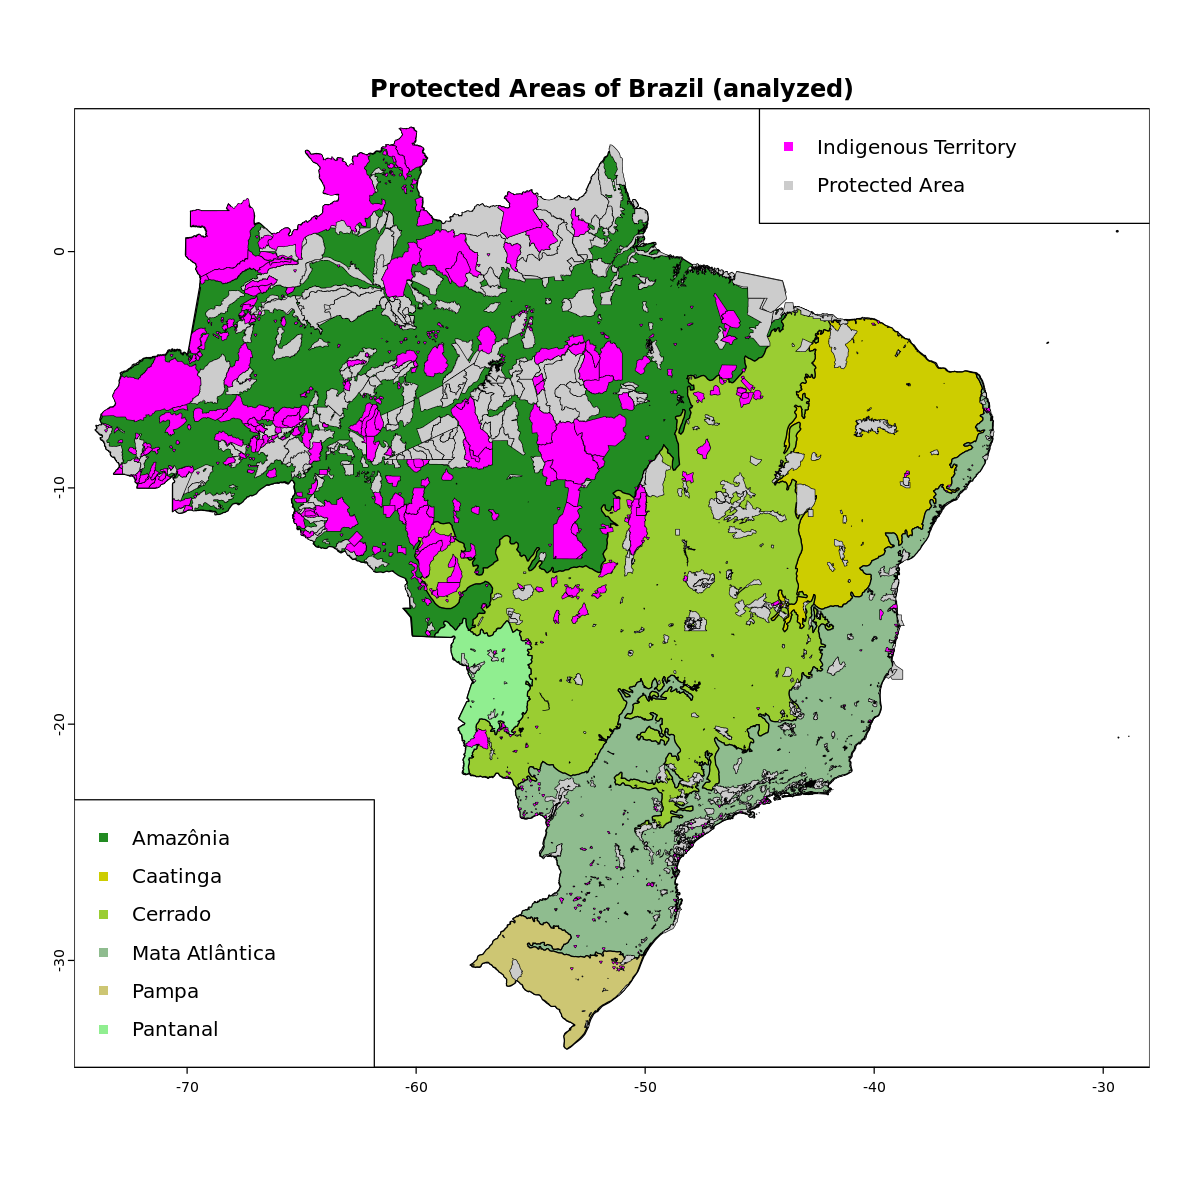

In [82]:
options(repr.plot.width=10, repr.plot.height=10)

plot(admBRA, main="Protected Areas of Brazil (analyzed)")

#plot(admBaE, col="forestgreen", add=T)
#plot(admBaW, col="darkgreen", add=T)
plot(adm_iso3[[1]], col="forestgreen", add=T)
plot(adm_iso3[[2]], col="yellow3", add=T)
plot(adm_iso3[[3]], col="yellowgreen", add=T)
plot(adm_iso3[[4]], col="darkseagreen", add=T)
plot(adm_iso3[[5]], col="khaki3", add=T)
plot(adm_iso3[[6]], col="lightgreen", add=T)

#legend=c("BaW","BaE","Bca","Bce","Bma","Bpp","Bpt")
#legend2=c("Amazônia West","Amazônia East","Caatinga","Cerrado","Mata Atlântica","Pampa","Pantanal")
#add_legend("bottomleft", legend=legend2, pch=15,
#           col=c("darkgreen","forestgreen","yellow3","yellowgreen","darkseagreen","khaki3","lightgreen"))

##extracted only
plot(allPAsBRA_extracted_PA, col="gray80", lwd=0.5, add=T)
plot(allPAsBRA_extracted_IT, col="magenta", lwd=0.5, add=T)
     
legend=c("Baz","Bca","Bce","Bma","Bpp","Bpt")
legend2=c("Amazônia","Caatinga","Cerrado","Mata Atlântica","Pampa","Pantanal")

add_legend("bottomleft", legend=legend2, pch=15,
           col=c("forestgreen","yellow3","yellowgreen","darkseagreen","khaki3","lightgreen"))

add_legend("topright", legend=c("Indigenous Territory","Protected Area"), pch=15,
           col=c("magenta","gray80"))

In [65]:
colnames(pa_stats_BRA_merg)

[1] "X.1"                  "WDPAID"               "pa_id"               
 [4] "count_0"              "count_1"              "meanrh98_0"          
 [7] "meanrh98_1"           "sdrh98_0"             "sdrh98_1"            
[10] "meanagbd_0"           "meanagbd_1"           "sdagbd_0"            
[13] "sdagbd_1"             "wwfbiom_0"            "wwfbiom_1"           
[16] "wwfecoreg_0"          "wwfecoreg_1"          "REGION_0"            
[19] "REGION_1"             "PFT_0"                "PFT_1"               
[22] "iso3"                 "rh98_difA"            "rh98_difP"           
[25] "agbd_difA"            "agbd_difP"            "X"                   
[28] "WDPA_PID"             "PA_DEF"               "NAME"                
[31] "ORIG_NAME"            "DESIG"                "DESIG_ENG"           
[34] "DESIG_TYPE"           "IUCN_CAT"             "INT_CRIT"            
[37] "MARINE"               "REP_M_AREA"           "GIS_M_AREA"          
[40] "REP_AREA"             "GIS_AREA"             "NO_TAKE"             
[43] "NO_TK_AREA"           "STATUS"               "STATUS_YR"           
[46] "GOV_TYPE"             "OWN_TYPE"             "MANG_AUTH"           
[49] "MANG_PLAN"            "VERIF"                "METADATAID"          
[52] "SUB_LOC"              "PARENT_ISO"           "ISO3"                
[55] "bbiome2"              "wwfbiome2"            "pa_area_ha"          
[58] "total_AGB"            "total_additional_AGB"

In [66]:
head(pa_stats_BRA_merg)

,X.1,WDPAID,pa_id,count_0,count_1,meanrh98_0,meanrh98_1,sdrh98_0,sdrh98_1,meanagbd_0,⋯,VERIF,METADATAID,SUB_LOC,PARENT_ISO,ISO3,bbiome2,wwfbiome2,pa_area_ha,total_AGB,total_additional_AGB
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,1,42,42,103204,97763,13.47764,9.343445,8.783294,8.138288,66.76191,⋯,State Verified,1802,BR-AP,BRA,BRA,Baz,TSMBF,395101.002,14821120.0,-11556578.8
2,2,43,43,188461,227646,19.51688,23.607956,10.609369,8.193464,125.81588,⋯,State Verified,1802,BR-PA,BRA,BRA,Baz,TSMBF,410506.368,72468454.2,20820234.5
3,3,44,44,204852,222043,17.58473,27.792308,11.228968,8.106952,106.51273,⋯,State Verified,1802,BR-RO,BRA,BRA,Baz,TSMBF,349061.914,76822273.4,39642737.0
4,4,47,47,16812,26761,13.77546,22.927883,9.082434,8.709167,66.21021,⋯,State Verified,1802,BR-ES,BRA,BRA,Bma,TSMBF,28005.814,3788562.9,1934291.9
5,5,48,48,8071,12710,15.86793,21.641925,10.865896,6.474836,82.68818,⋯,State Verified,1802,BR-BA,BRA,BRA,Bma,TSMBF,18833.813,2594422.6,1037088.9
6,6,49,49,3441,3395,11.36135,16.610619,8.961372,7.795117,43.81820,⋯,State Verified,1802,BR-RJ,BRA,BRA,Bma,TSMBF,5089.369,435712.1,212705.1


In [ ]:
##--------------------------------------------------------------------------------

In [55]:
## ranking by mean_agbd_diff
table1 <- pa_stats_BRA_merg  %>% 
  dplyr::select( WDPAID, NAME, DESIG_ENG, agbd_difA, total_additional_AGB, pa_area_ha, wwfecoreg_1, wwfbiome2, bbiome2) %>% 
  arrange(desc(agbd_difA)) %>% head(nrow(pa_stats_BRA_merg)) %>% 
  dplyr::mutate(pa_area_ha = format(round(as.numeric(pa_area_ha),2), nsmall=2, big.mark=","),
                total_additional_AGB = format(round(total_additional_AGB,2), nsmall=2, big.mark=","))

names(table1) <- c("PA ID", 'PA name', 'Designation', 'Mean additional preserved AGBD (Mg/ha)  ',
                   'Total additional preserved AGB (kt)', 'Area (ha)', 'Ecoregion', 'Biome', 'Region')

#filepath <- "/projects/my-public-bucket/GEDI_global_PA_v2/WDPA_extract/pa_stats/"
#filename <- "BRA_pa_stats_summary_TABLE1ALL_meanAGBD.csv"
#write.csv(table1, file=paste(filepath, filename, sep=""), row.names=FALSE)

In [56]:
table1POS <- table1[table1$`Mean additional preserved AGBD (Mg/ha)  `>0,]
nrow(table1POS)

table1NEG <- table1[table1$`Mean additional preserved AGBD (Mg/ha)  `<0,]
nrow(table1NEG)

#-------------------------------------------------------------------------------
colfunc <- colorRampPalette(c("forestgreen", "white"))
colsPOS <- colfunc(nrow(table1POS))
colfunc <- colorRampPalette(c("white", "blue"))
colsNEG <- colfunc(nrow(table1NEG))
#-------------------------------------------------------------------------------


[1] 938

[1] 680

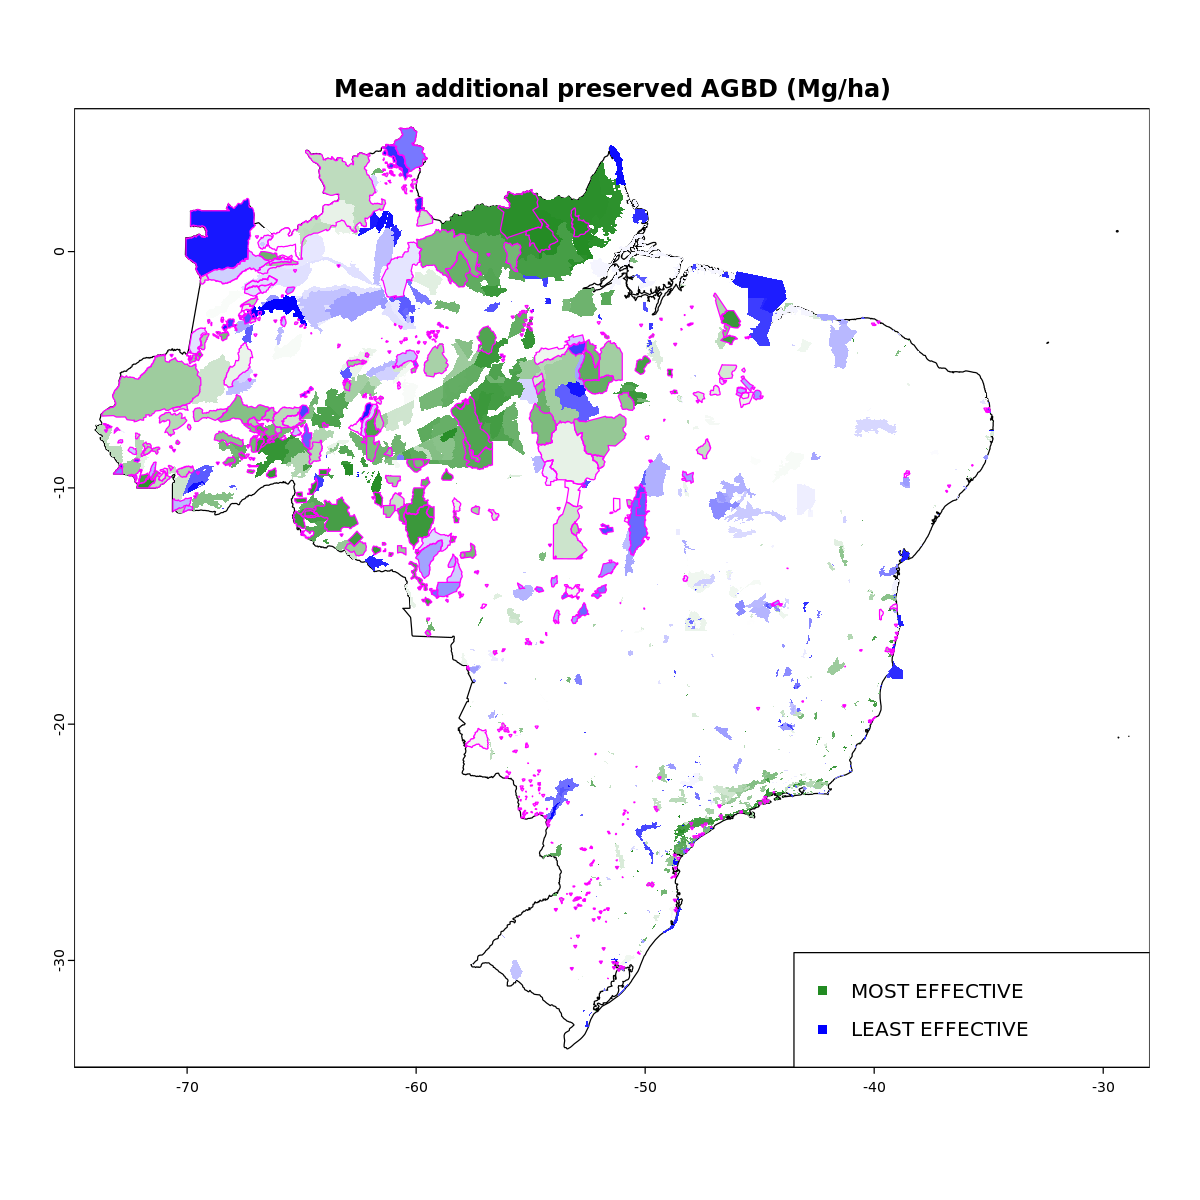

In [57]:
options(repr.plot.width=10, repr.plot.height=10)

#plot(admBRA, main="Protected Areas of Brazil (analyzed)")
plot(admBRA, main="Mean additional preserved AGBD (Mg/ha)")

##
#for(i in 1:nrow(table1POS)){
for(i in 1:nrow(table1POS)){
  pa_id <- table1POS[i,"PA ID"]
  plot(allPAsBRA_extracted[allPAsBRA_extracted$WDPAID==pa_id,], add=T, col=colsPOS[i], border=NA)
}
for(j in 1:nrow(table1NEG)){
  pa_id <- table1NEG[j,"PA ID"]
  plot(allPAsBRA_extracted[allPAsBRA_extracted$WDPAID==pa_id,], add=T, col=colsNEG[j], border=NA)
}

for(i in 1:nrow(table1)){
  pa_id <- table1[i,"PA ID"]
  plot(allPAsBRA_extracted_IT[allPAsBRA_extracted_IT$WDPAID==pa_id,], add=T, col=NA, border="magenta")
}

add_legend("bottomright", legend=c("MOST EFFECTIVE","LEAST EFFECTIVE"), pch=15,
           col=c("forestgreen","blue"))


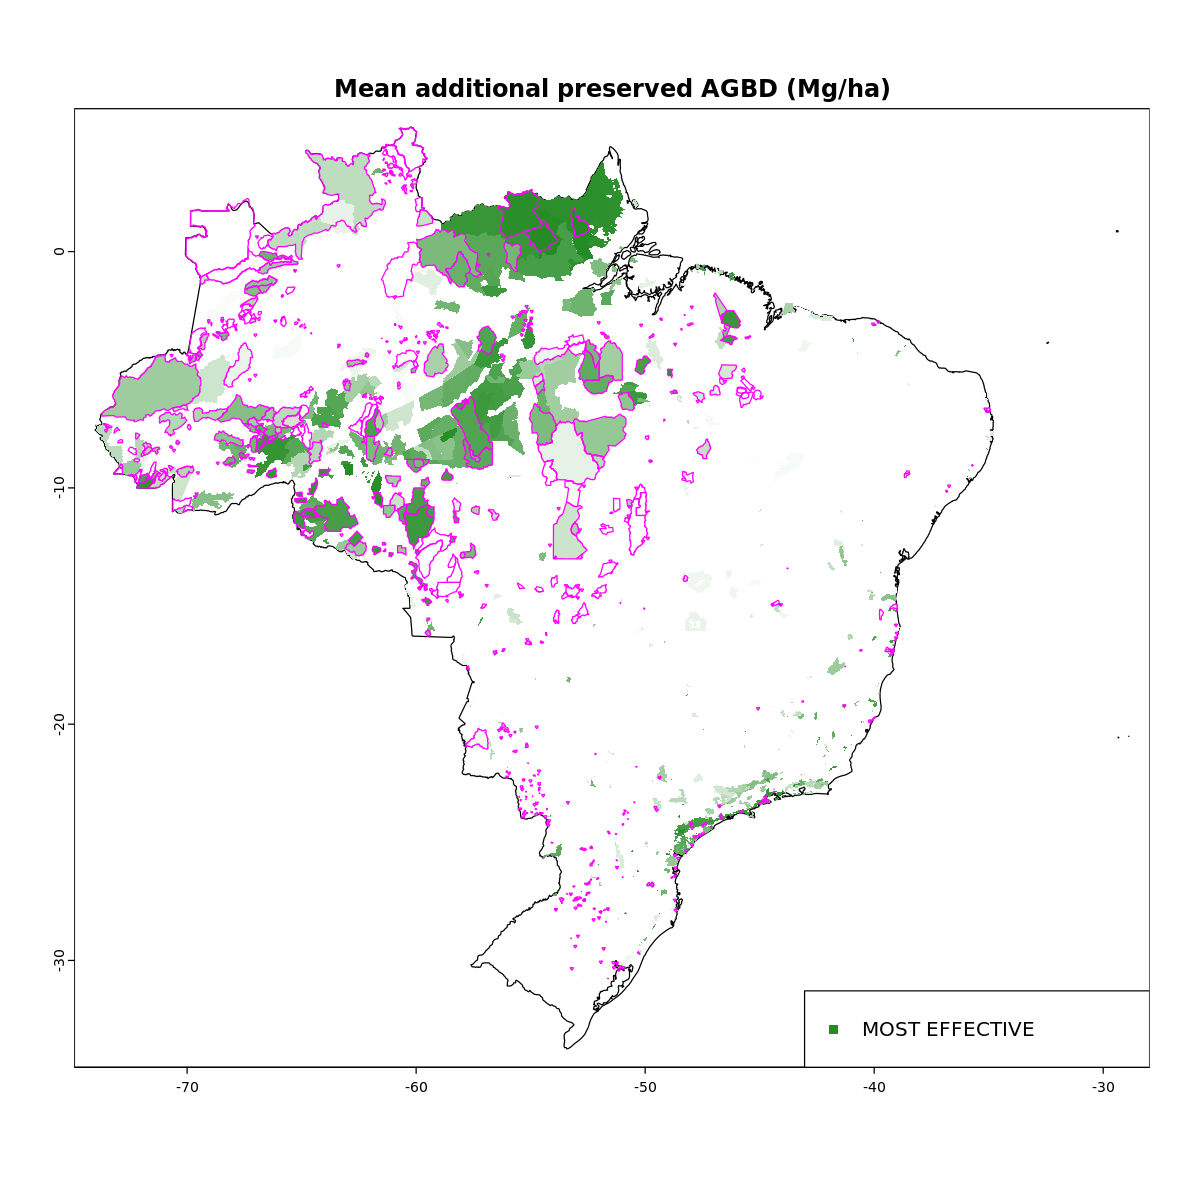

In [71]:
options(repr.plot.width=10, repr.plot.height=10)

#plot(admBRA, main="Protected Areas of Brazil (analyzed)")
plot(admBRA, main="Mean additional preserved AGBD (Mg/ha)")

##
#for(i in 1:nrow(table1POS)){
for(i in 1:nrow(table1POS)){
  pa_id <- table1POS[i,"PA ID"]
  plot(allPAsBRA_extracted[allPAsBRA_extracted$WDPAID==pa_id,], add=T, col=colsPOS[i], border=NA)
}
#for(j in 1:nrow(table1NEG)){
#  pa_id <- table1NEG[j,"PA ID"]
#  plot(allPAsBRA_extracted[allPAsBRA_extracted$WDPAID==pa_id,], add=T, col=colsNEG[j], border=NA)
#}

for(i in 1:nrow(table1)){
  pa_id <- table1[i,"PA ID"]
  plot(allPAsBRA_extracted_IT[allPAsBRA_extracted_IT$WDPAID==pa_id,], add=T, col=NA, border="magenta")
}

add_legend("bottomright", legend=c("MOST EFFECTIVE"), pch=15, col=c("forestgreen"))


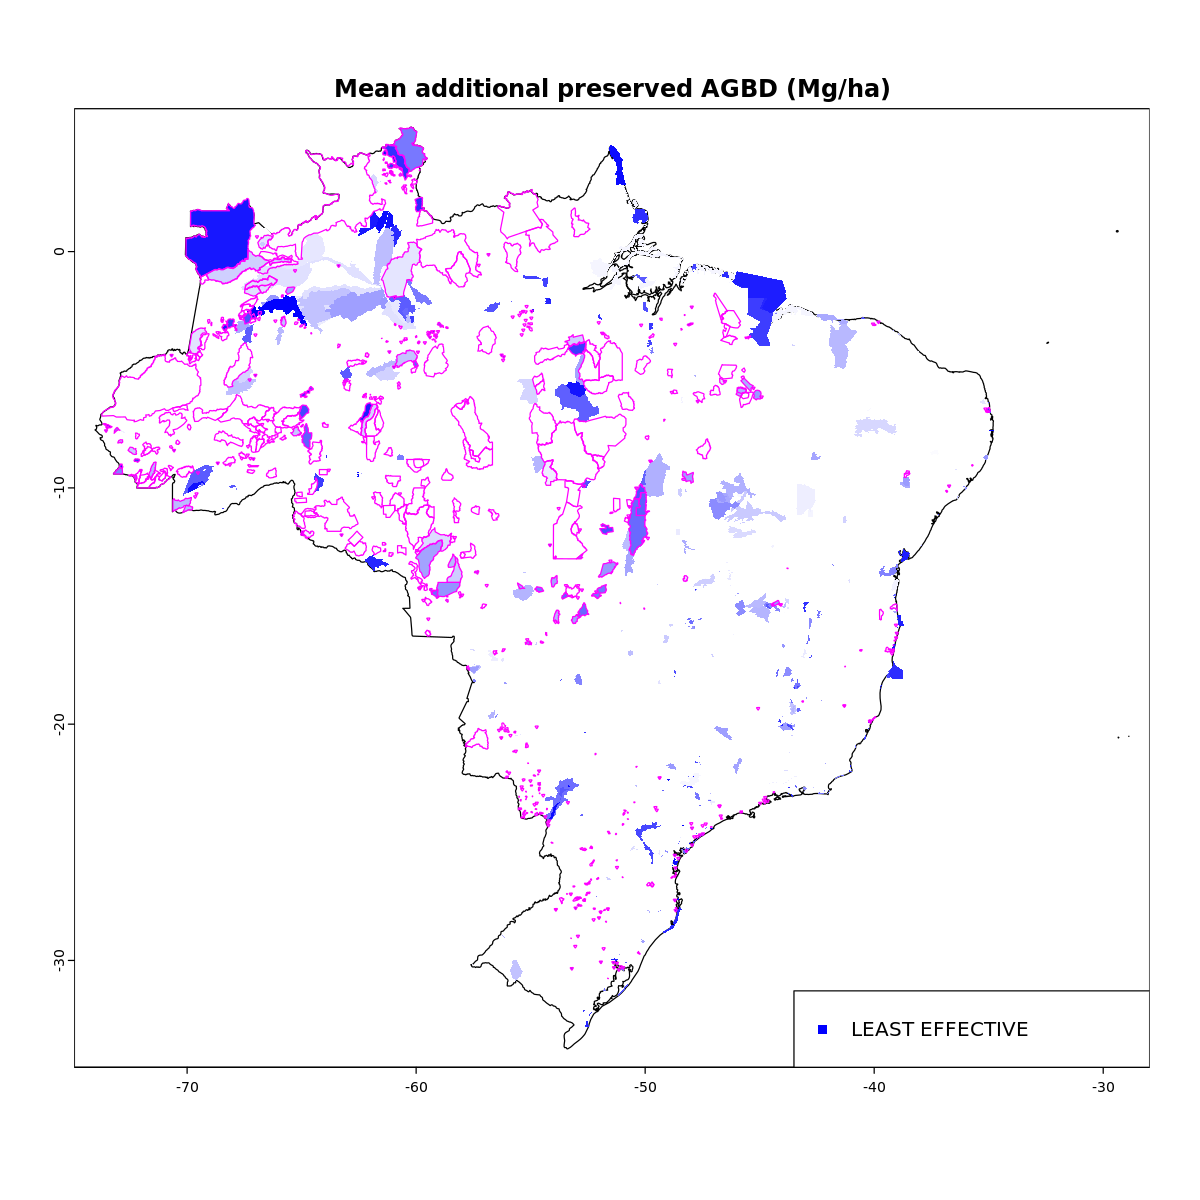

In [72]:
options(repr.plot.width=10, repr.plot.height=10)

#plot(admBRA, main="Protected Areas of Brazil (analyzed)")
plot(admBRA, main="Mean additional preserved AGBD (Mg/ha)")

##
#for(i in 1:nrow(table1POS)){
#  pa_id <- table1POS[i,"PA ID"]
#  plot(allPAsBRA_extracted[allPAsBRA_extracted$WDPAID==pa_id,], add=T, col=colsPOS[i], border=NA)
#}
for(j in 1:nrow(table1NEG)){
  pa_id <- table1NEG[j,"PA ID"]
  plot(allPAsBRA_extracted[allPAsBRA_extracted$WDPAID==pa_id,], add=T, col=colsNEG[j], border=NA)
}

for(i in 1:nrow(table1)){
  pa_id <- table1[i,"PA ID"]
  plot(allPAsBRA_extracted_IT[allPAsBRA_extracted_IT$WDPAID==pa_id,], add=T, col=NA, border="magenta")
}

add_legend("bottomright", legend=c("LEAST EFFECTIVE"), pch=15, col=c("blue"))


In [67]:
head(table1)

,PA ID,PA name,Designation,Mean additional preserved AGBD (Mg/ha),Total additional preserved AGB (kt),Area (ha),Ecoregion,Biome,Region
,<int>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
1,33812,Waiãpi,Indigenous Area,169.6250,"103,234,924.49","608,606.71",Uatuma-Trombetas moist forests,TSMBF,Baz
2,10814,Floresta Nacional De Passo Fundo,Forest,147.7778,"197,808.34","1,338.55",Araucaria moist forests,TSMBF,Bma
3,555600055,Área De Proteção Ambiental Estadual Do Piraquara,Environmental Protection Area,146.7976,"1,323,384.13","9,015.03",Araucaria moist forests,TSMBF,Bma
4,10808,Floresta Nacional De Três Barras,Forest,146.7483,"646,185.41","4,403.36",Araucaria moist forests,TSMBF,Bma
5,352172,Reserva Extrativista Piquiá,Extractive Reserve,145.4862,"212,265.11","1,459.01",Madeira-Tapaj�s moist forests,TSMBF,Baz
6,352164,Reserva Extrativista Sucupira,Extractive Reserve,135.1941,"416,051.54","3,077.44",Madeira-Tapaj�s moist forests,TSMBF,Baz


In [58]:
## ranking by total preserved AGB
table2 <- pa_stats_BRA_merg  %>% 
  dplyr::select( WDPAID, NAME, DESIG_ENG, agbd_difA, total_additional_AGB, pa_area_ha, wwfecoreg_1, wwfbiome2, bbiome2) %>% 
  arrange(desc(total_additional_AGB)) %>% head(nrow(pa_stats_BRA_merg)) %>% 
  dplyr::mutate(pa_area_ha = format(as.numeric(pa_area_ha), nsmall=2, big.mark=",") ,
                total_additional_AGB = format(total_additional_AGB, nsmall=1, big.mark=",") )

names(table2) <- c("PA ID", 'PA name', 'Designation', 'Mean additional preserved AGBD (Mg/ha)  ',
                   'Total additional preserved AGB (kt)', 'Area (ha)', 'Ecoregion', 'Biome', 'Region')


In [59]:
table2POS <- table2[as.numeric(table2$`Total additional preserved AGB (kt)`)>0,]
nrow(table2POS)

table2NEG <- table2[as.numeric(table2$`Total additional preserved AGB (kt)`)<0,]
nrow(table2NEG)

#-------------------------------------------------------------------------------
colfunc <- colorRampPalette(c("forestgreen", "white"))
colsPOS <- colfunc(nrow(table2POS))
colfunc <- colorRampPalette(c("white", "blue"))
colsNEG <- colfunc(nrow(table2NEG))
#-------------------------------------------------------------------------------


[1] 938

[1] 680

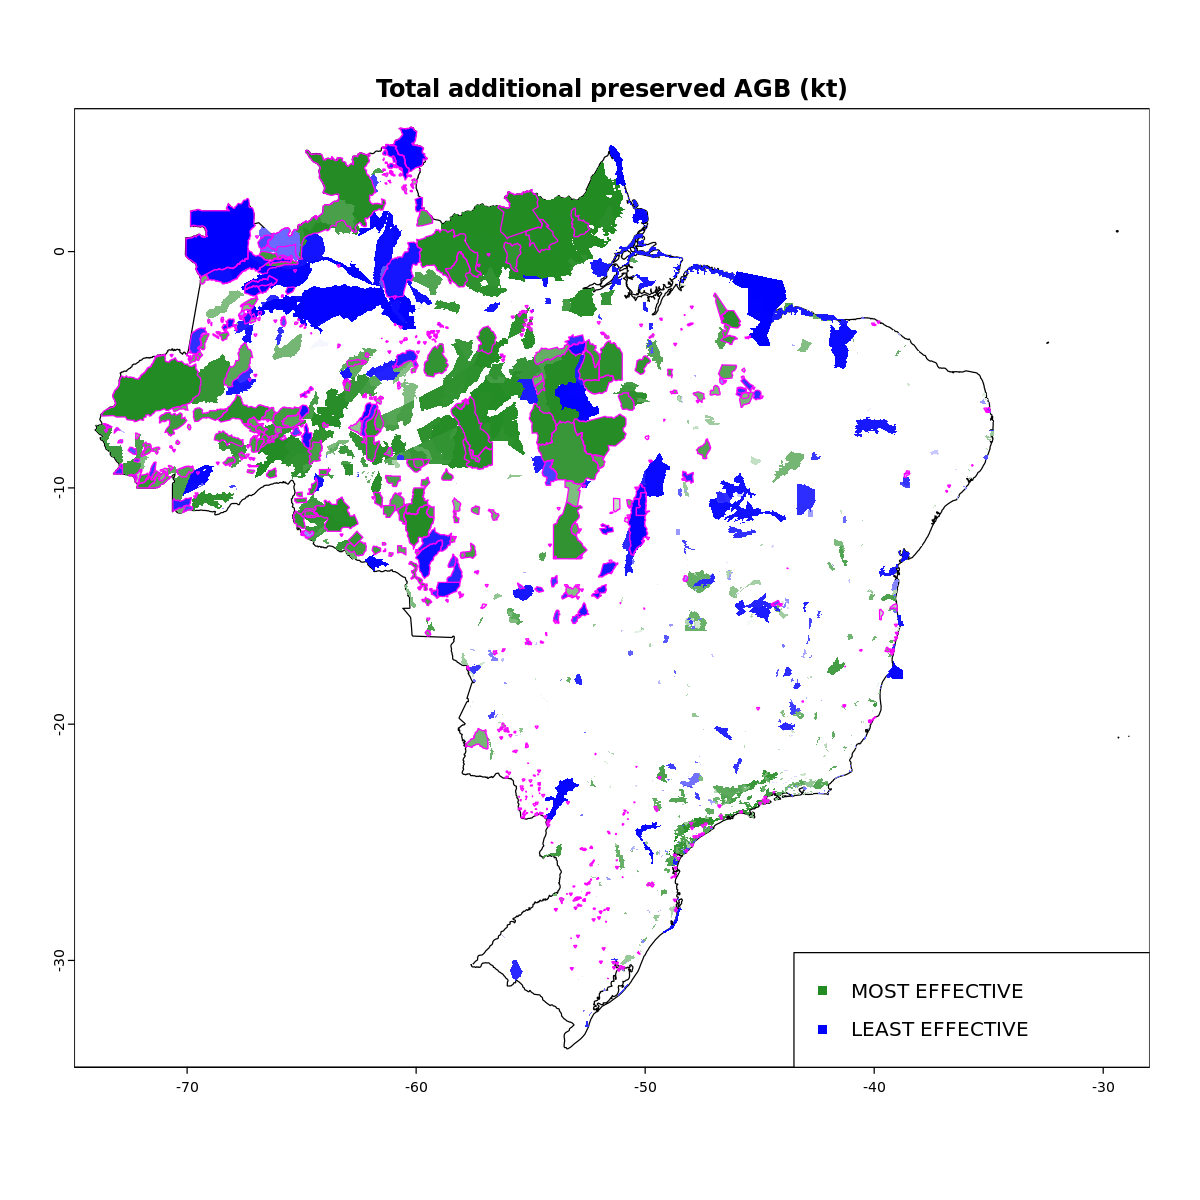

In [60]:
options(repr.plot.width=10, repr.plot.height=10)

#plot(admBRA, main="Protected Areas of Brazil (analyzed)")
plot(admBRA, main="Total additional preserved AGB (kt)")

##
#for(i in 1:nrow(table1POS)){
for(i in 1:nrow(table2POS)){
  pa_id <- table2POS[i,"PA ID"]
  plot(allPAsBRA_extracted[allPAsBRA_extracted$WDPAID==pa_id,], add=T, col=colsPOS[i], border=NA)
}
for(j in 1:nrow(table2NEG)){
  pa_id <- table2NEG[j,"PA ID"]
  plot(allPAsBRA_extracted[allPAsBRA_extracted$WDPAID==pa_id,], add=T, col=colsNEG[j], border=NA)
}

for(i in 1:nrow(table2)){
  pa_id <- table2[i,"PA ID"]
  plot(allPAsBRA_extracted_IT[allPAsBRA_extracted_IT$WDPAID==pa_id,], add=T, col=NA, border="magenta")
}

add_legend("bottomright", legend=c("MOST EFFECTIVE","LEAST EFFECTIVE"), pch=15,
           col=c("forestgreen","blue"))


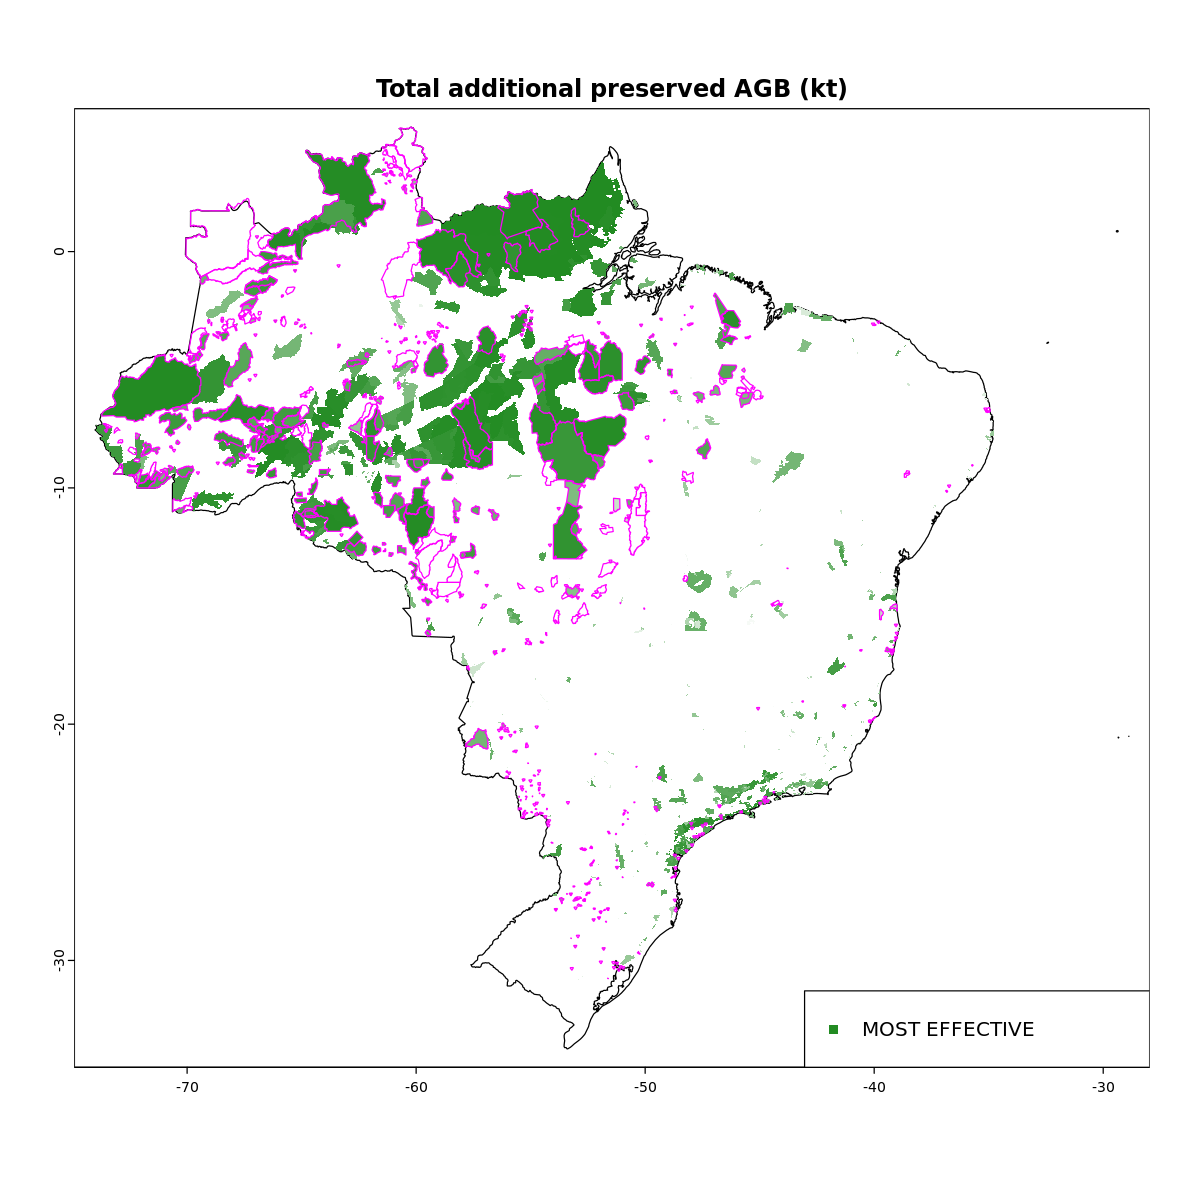

In [73]:
options(repr.plot.width=10, repr.plot.height=10)

#plot(admBRA, main="Protected Areas of Brazil (analyzed)")
plot(admBRA, main="Total additional preserved AGB (kt)")

##
for(i in 1:nrow(table2POS)){
  pa_id <- table2POS[i,"PA ID"]
  plot(allPAsBRA_extracted[allPAsBRA_extracted$WDPAID==pa_id,], add=T, col=colsPOS[i], border=NA)
}
#for(j in 1:nrow(table2NEG)){
#  pa_id <- table2NEG[j,"PA ID"]
#  plot(allPAsBRA_extracted[allPAsBRA_extracted$WDPAID==pa_id,], add=T, col=colsNEG[j], border=NA)
#}

for(i in 1:nrow(table2)){
  pa_id <- table2[i,"PA ID"]
  plot(allPAsBRA_extracted_IT[allPAsBRA_extracted_IT$WDPAID==pa_id,], add=T, col=NA, border="magenta")
}

add_legend("bottomright", legend=c("MOST EFFECTIVE"), pch=15, col=c("forestgreen"))


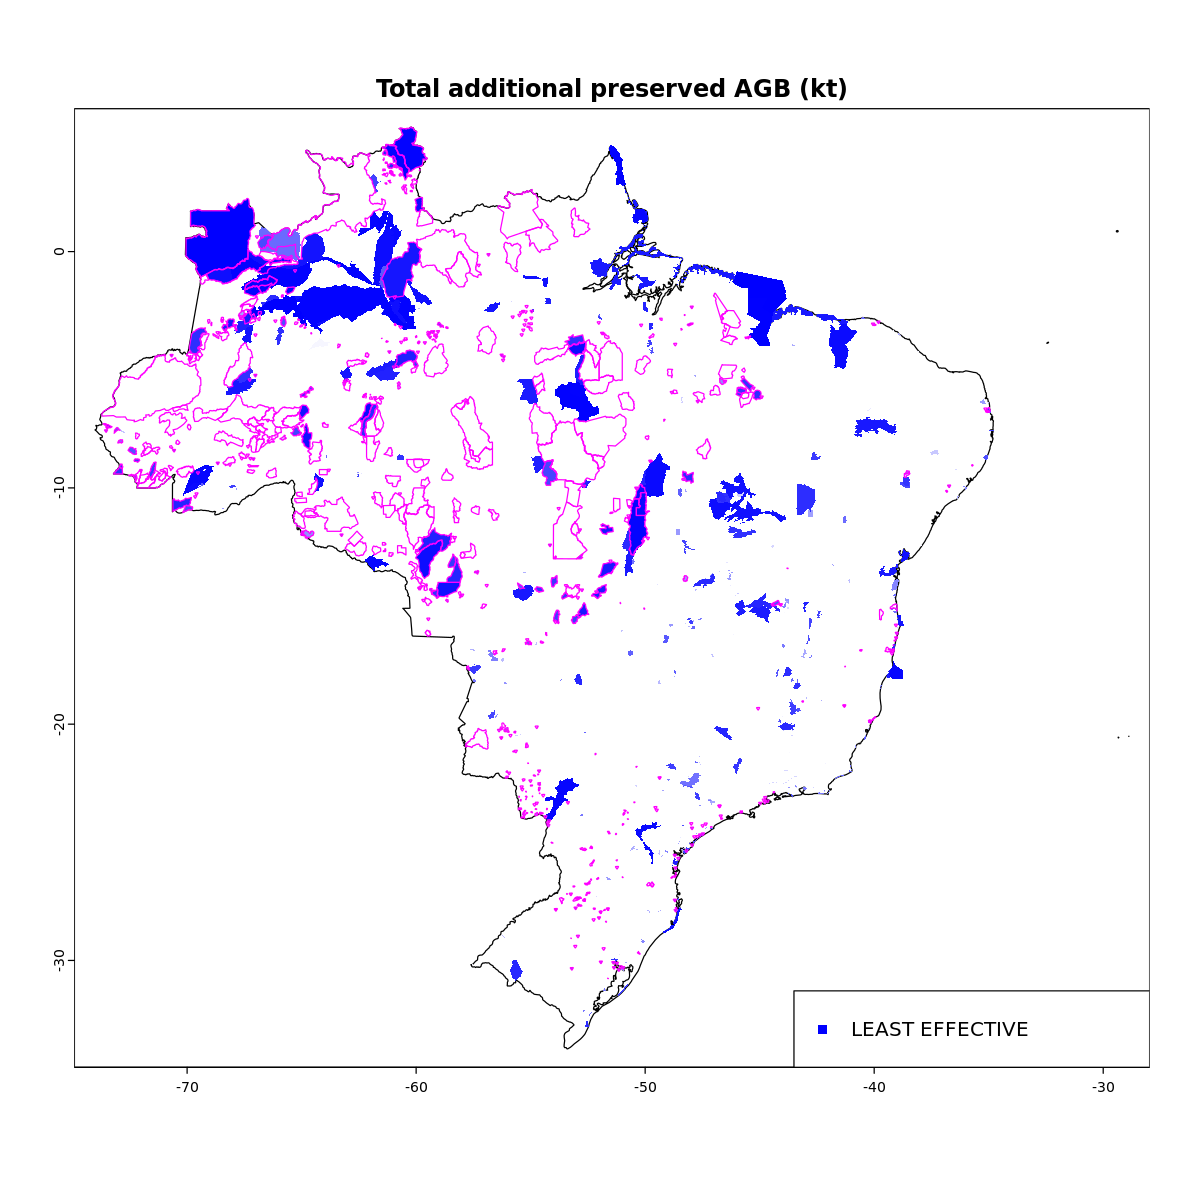

In [74]:
options(repr.plot.width=10, repr.plot.height=10)

#plot(admBRA, main="Protected Areas of Brazil (analyzed)")
plot(admBRA, main="Total additional preserved AGB (kt)")

##
#for(i in 1:nrow(table2POS)){
#  pa_id <- table2POS[i,"PA ID"]
#  plot(allPAsBRA_extracted[allPAsBRA_extracted$WDPAID==pa_id,], add=T, col=colsPOS[i], border=NA)
#}
for(j in 1:nrow(table2NEG)){
  pa_id <- table2NEG[j,"PA ID"]
  plot(allPAsBRA_extracted[allPAsBRA_extracted$WDPAID==pa_id,], add=T, col=colsNEG[j], border=NA)
}

for(i in 1:nrow(table2)){
  pa_id <- table2[i,"PA ID"]
  plot(allPAsBRA_extracted_IT[allPAsBRA_extracted_IT$WDPAID==pa_id,], add=T, col=NA, border="magenta")
}

add_legend("bottomright", legend=c("LEAST EFFECTIVE"), pch=15, col=c("blue"))


In [62]:
table1[table1[,"PA ID"]==34004,]

,PA ID,PA name,Designation,Mean additional preserved AGBD (Mg/ha),Total additional preserved AGB (kt),Area (ha),Ecoregion,Biome,Region
,<int>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
494,34004,Kayapó,Indigenous Area,21.63011,"71,481,783.74","3,304,735.16",Xingu-Tocantins-Araguaia moist forests,TSMBF,Baz


In [157]:
pa_stats_BRA_merg[pa_stats_BRA_merg$WDPAID==34004,c("meanagbd_1","pa_area_ha","total_AGB","total_additional_AGB")]

,meanagbd_1,pa_area_ha,total_AGB,total_additional_AGB
,<dbl>,<dbl>,<dbl>,<dbl>
295,112.0185,3304735,370191314,71481784


In [68]:
head(table2)

,PA ID,PA name,Designation,Mean additional preserved AGBD (Mg/ha),Total additional preserved AGB (kt),Area (ha),Ecoregion,Biome,Region
,<int>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
1,351784,Parque Nacional Montanhas Do Tumucumaque,Park,101.81702,3.961886e+08,3.891183e+06,Guianan moist forests,TSMBF,Baz
2,352198,Estação Ecológica Do Grão Pará,Ecological Station,76.76204,3.248667e+08,4.232127e+06,Uatuma-Trombetas moist forests,TSGSS+TSMBF,Baz
3,10801,Parque do Tumucumaque,Indigenous Area,102.96325,3.183669e+08,3.092044e+06,Guianan moist forests,TSGSS+TSMBF,Baz
4,555576204,Floresta Estadual Do Amapá,Forest,97.09457,2.316934e+08,2.386265e+06,Guianan moist forests,TSMBF+TSGSS,Baz
5,352200,Floresta Estadual Do Paru,Forest,61.55249,2.237050e+08,3.634378e+06,Uatuma-Trombetas moist forests,TSMBF,Baz
6,33920,Vale do Javari,Indigenous Area,19.55347,1.679720e+08,8.590393e+06,Southwest Amazon moist forests,TSMBF,Baz
